# Ejercicios Recuperación Aprendizaje Automático.

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


# 1. Reglas de asociación. (20 puntos)
En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

La importación del archivo se puede realizar utilizando el siguiente código:

    import csv

    groceries =  []
    groceries_file = csv.reader(open("groceries.csv", "rb"))

    for row in groceries_file:
        groceries.append(row)

La importación de los datos se realiza utilizando el código suministrado

In [2]:
import csv

groceries =  []
groceries_file = csv.reader(open("groceries.csv", "rb"))

for row in groceries_file:
    groceries.append(row)

Se obtienen el listado de productos con un soporte mínimo se 0,15. 

In [3]:
import apriori
F = apriori.apriori(groceries, min_support = 0.15, verbose = True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


Para obtener las reglas de asociación indicadas se ha de obtener primero el listado de productos con un soporte de 0,05

In [4]:
F, soporte = apriori.apriori(groceries, min_support = 0.05, verbose = True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


Siendo posible obtener ahora las reglas de asociación

In [5]:
H = apriori.generate_rules(F, soporte, min_confidence = 0.25, verbose = True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


# 2. Segmentación de datos de redes sociales. (20 puntos)
En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perfiles aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el año de graduación ('gradyear'), el género ('gender') y la edad (‘age’).  Utilizando el algoritmo de k-means identificar el número de segmentos óptimos en los que se divide cada subconjunto de datos y obtener los valores de los centroides.

In [6]:
import pandas as pd

sns_data = pd.read_csv('snsdata.csv', sep = ',')

En primer lugar, como indica en el enunciado, se ha de separar el conjunto en base al género ('F' y 'M') y eliminar las columnas año de graduación ('gradyear'), el género ('gender') y la edad ('age').

In [7]:
sns_data_F = sns_data[sns_data.gender == 'F']
sns_data_M = sns_data[sns_data.gender == 'M']

col_names = list(sns_data.columns)
col_names.remove('gradyear')
col_names.remove('gender')
col_names.remove('age')

sns_data_F = sns_data_F[col_names]
sns_data_M = sns_data_M[col_names]

Ahora se cargar los métodos para la selección de la cantidad optima de clúster.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_distorsion(data, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(data)
        meandistortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis = 1)) / data.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

Se analiza en primer lugar el grupo de mujeres

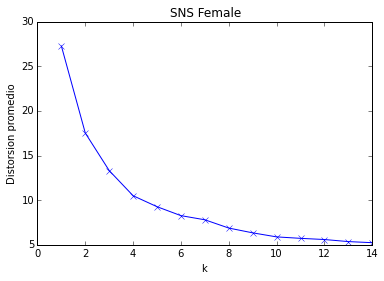

In [9]:
plot_distorsion(sns_data_F, "SNS Female", max_k = 15)

El método de la distorsión indica que el número de clusters para este conjunto de datos es 7. La posición de los centroides se puede obtener ahora como:

In [10]:
kmeans = KMeans(n_clusters = 7, n_init = 10).fit(sns_data_F)
kmeans.cluster_centers_

array([[  4.81155936e+00,   2.18645485e-01,   1.86350334e-01,
          1.94293478e-01,   1.60326087e-01,   1.31688963e-01,
          1.32420569e-01,   1.06396321e-01,   5.82148829e-02,
          8.27759197e-02,   1.21969064e-01,   3.37583612e-01,
          2.31605351e-01,   1.48620401e-01,   1.31688963e-01,
          1.14653010e-01,   4.24540134e-01,   2.70589465e-01,
          3.54306020e-02,   7.29096990e-01,   2.28887960e-01,
          4.27362040e-01,   2.23035117e-01,   9.26003344e-02,
          1.80811037e-02,   4.78783445e-01,   1.17161371e-01,
          9.98118729e-02,   2.54807692e-01,   3.79389632e-01,
          1.59594482e-01,   6.25000000e-02,   4.66137124e-02,
          1.84051003e-01,   1.10054348e-01,   9.38545151e-02,
          7.05476589e-02],
       [  1.42316456e+02,   3.89240506e-01,   3.03797468e-01,
          2.13607595e-01,   3.35443038e-01,   2.54746835e-01,
          1.70886076e-01,   2.16772152e-01,   8.38607595e-02,
          9.01898734e-02,   1.26582278e-01,

Ahora se analiza el grupo de hombres

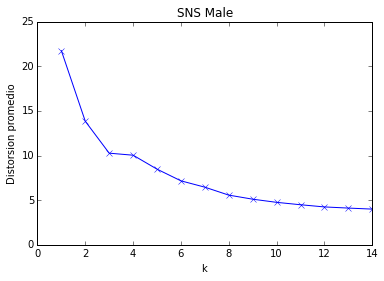

In [11]:
plot_distorsion(sns_data_M, "SNS Male", max_k = 15)

El método de la distorsión indica que el número de clusters para este conjunto de datos es 4. La posición de los centroides se puede obtener ahora como:

In [12]:
kmeans = KMeans(n_clusters = 4, n_init = 10).fit(sns_data_M)
kmeans.cluster_centers_

array([[  8.28825301e+00,   2.86746988e-01,   4.36144578e-01,
          1.90963855e-01,   5.72289157e-03,   2.92168675e-02,
          7.65060241e-02,   8.43373494e-03,   2.44879518e-01,
          8.82530120e-02,   1.91265060e-01,   5.96385542e-02,
          1.59036145e-01,   7.92168675e-02,   5.09036145e-02,
          5.18072289e-02,   1.90361446e-01,   3.15361446e-01,
          4.27710843e-02,   6.38554217e-01,   2.29216867e-01,
          4.05722892e-01,   1.71686747e-01,   1.08132530e-01,
          2.50000000e-02,   1.74096386e-01,   3.04216867e-02,
          1.95783133e-02,   1.13855422e-01,   3.91566265e-02,
          6.74698795e-02,   2.56024096e-02,   1.89759036e-02,
          1.69277108e-01,   1.05722892e-01,   6.50602410e-02,
          5.60240964e-02],
       [  4.22384365e+01,   3.53094463e-01,   4.71009772e-01,
          2.29967427e-01,   1.04234528e-02,   4.03908795e-02,
          8.72964169e-02,   5.21172638e-03,   2.89250814e-01,
          1.14006515e-01,   2.15635179e-01,

# 3.Componentes principales. (20 puntos)
En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que explica la primera componente principal.

In [13]:
import pandas as pd

sns_data = pd.read_csv('concrete.csv', sep = ',')

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit_transform(sns_data)

print "El 50% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.50).tolist().index(True) + 1,"variables"
print "El 75% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.75).tolist().index(True) + 1,"variables"
print "El 90% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.90).tolist().index(True) + 1,"variables"
print
print "La primera componente principal explicar el %2.1f%%" % (pca.explained_variance_ratio_[0] * 100)

El 50% de la varianza de las mezclas se puede explicar con 2 variables
El 75% de la varianza de las mezclas se puede explicar con 3 variables
El 90% de la varianza de las mezclas se puede explicar con 5 variables

La primera componente principal explicar el 32.5%


# 3. Regresión de una función con Theano. (20 puntos)
Crear un conjunto de datos utilizando el siguiente código:

    trX = np.linspace(-1, 1, 101)
    trY = np.linspace(-1, 1, 101)
    for i in range(len(trY)):
        trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo
$$ y = \log(1 + w_0  |x|) + w_1  x, $$
utilizando los datos generados anteriormente.


Se crea el conjunto de datos indicado

In [15]:
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)
for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

In [16]:
import theano
import theano.tensor as T

X = T.scalar()
Y = T.scalar()

def model(X, w0, w1):
    return T.log(1 + w0 * abs(X)) + w1 * X

w0 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w0, w1)

cost = T.mean(T.sqr(y - Y))
gradient0 = T.grad(cost = cost, wrt = w0)
gradient1 = T.grad(cost = cost, wrt = w1)
updates = [[w0, w0 - gradient0 * 0.01], [w1, w1 - gradient1 * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(10):
    for x, y in zip(trX, trY):
        train(x, y)
        
    print "En el paso ", i, " w0 = ", w0.get_value(), " y w1 = ", w1.get_value()

En el paso  0  w0 =  0.20046440798  y w1 =  0.170165792246
En el paso  1  w0 =  0.306379292521  y w1 =  0.256903992152
En el paso  2  w0 =  0.3708150957  y w1 =  0.299420877076
En el paso  3  w0 =  0.412358767009  y w1 =  0.319759927928
En el paso  4  w0 =  0.43993024534  y w1 =  0.329216607674
En el paso  5  w0 =  0.458522706156  y w1 =  0.333430573554
En el paso  6  w0 =  0.471177629675  y w1 =  0.335175231
En el paso  7  w0 =  0.479840121081  y w1 =  0.335794808227
En el paso  8  w0 =  0.485790753318  y w1 =  0.335929053887
En el paso  9  w0 =  0.489887703998  y w1 =  0.335874517292
